# Tarefa 1: Aprendizado Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

### 1) Tarefa: implementar a função “fit_linear_regression(pontos)”. Retorne os valores de m e de a.

**Variáveis**:
- pontos: conjunto de pontos 2D (casos x mortes) que serão clusterizados
- Desafio: pesquise sobre como realizar regressão linear para casos com 3 dimensões (2 features e 1 target) e implemente a função fit_linear_regression_3D(pontos).


O seu relatório será o notebook exportado para um arquivo HTML e deve conter:
- Um scatter plot mostrando os pontos e a linha estimada na regressão.
- Calcule o R2 e discorra sobre o quão boa foi a sua aproximação, sugerindo possíveis formas de melhorar o seu modelo.
- Compare os seus resultados com os obtidos através do sklearn.linear_model.LinearRegression. Eles deveriam ser iguais.

### 1. Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 2. Carregando dados

In [2]:
dataset = pd.read_csv("./Dataset/base-covid-19-us.csv")
dataset.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [3]:
dataset.shape

(1570, 3)

In [4]:
dataset.sort_values(by=['deaths'], inplace=True)

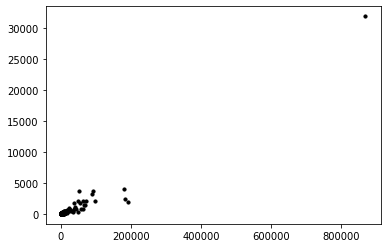

In [5]:
cases = dataset['cases'].values
deaths = dataset['deaths'].values
plt.scatter(cases, deaths, c='black', s=10)

### 3. Criando classe da Regressão Linear

In [6]:
class linearRegression:
    def __init__(self, pontos):
        self.pontos = pontos
        self.X = self.pontos['cases'].values
        self.Y = self.pontos['deaths'].values
        self.n = len(self.X)
        self.x_media = 0
        self.y_media = 0
        
    def fit(self):
        self.x_media = np.mean(self.X)
        self.y_media = np.mean(self.Y)

        numerador = 0
        denominador = 0
        for i in range(self.n):
            numerador += (self.X[i] - self.x_media) * (self.Y[i] - self.y_media)
            denominador += (self.X[i] - self.x_media) ** 2

        self.m = numerador / denominador
        self.a = self.y_media - (self.m * self.x_media)

        return (self.m, self.a)
    
    def plot(self):
        x_max = np.max(self.X) + 100
        x_min = np.min(self.X) - 100

        x = np.linspace(x_min, x_max, 1000)
        y = self.a + self.m * x
        
        plt.plot(x, y, color='#00ff00', label='Linear Regression')
        plt.scatter(self.X, self.Y, color='#ff0000', label='Data Point')
        plt.xlabel('Cases')
        plt.ylabel('Deaths')
        plt.legend()
        plt.show()
        
    def rmse(self):
        self.rmse = 0
        for i in range(self.n):
            y_pred =  self.a + (self.m * self.X[i])
            self.rmse += (self.Y[i] - y_pred) ** 2

        self.rmse = np.sqrt(self.rmse/self.n)
        return self.rmse
    
    def r2(self):
        self.sumofsquares = 0
        self.sumofresiduals = 0
        self.score = 0 
        
        for i in range(self.n) :
            y_pred = self.a + (self.m * self.X[i])
            self.sumofsquares += (self.Y[i] - self.y_media) ** 2
            self.sumofresiduals += (self.Y[i] - y_pred) **2

        self.score  = 1 - (self.sumofresiduals/self.sumofsquares)
        return self.score

### 4. Regressão Linear

In [7]:
lRegression = linearRegression(dataset)
m, a = lRegression.fit()

#### 4.1. Coeficientes

In [8]:
print(f'Coeficiente "m": {m}\nCoeficiente "a": {a}')

Coeficiente "m": 0.033631581834363655
Coeficiente "a": -18.63012262250561


#### 4.2. Gráfico

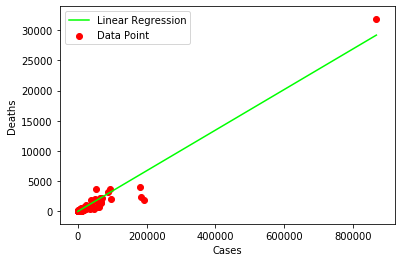

In [9]:
lRegression.plot()

#### 4.3. RMSE

In [10]:
lRegression.rmse()

198.486116140131

#### 4.4. R2

In [11]:
lRegression.r2()

0.9444904768158006

**Análise:** 
- O modelo obteve um bom valor de R². 
- R² = 0.94 significa que o modelo linear explica 94% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele no modelo apresentado linear. 

**Possíveis melhoras:**
- Aumentar o volume de dados.
- Aumentar a quantidade de variáveis independentes.

### 5. Comparando com o modelo do Sklearn

In [12]:
X = dataset['cases'].values.reshape(-1,1)
y = dataset['deaths'].values.reshape(-1,1)


reg = LinearRegression().fit(X, y)
reg.score(X, y)

print(f'Coeficiente "m": {reg.coef_[0][0]}\nCoeficiente "a": {reg.intercept_[0]}')

Coeficiente "m": 0.03363158183436364
Coeficiente "a": -18.630122622505567


In [13]:
rmse = mean_squared_error(y, reg.intercept_[0]+(reg.coef_[0][0]*X), squared = False)
print(f'RMSE: {rmse}')

RMSE: 198.48611614013106


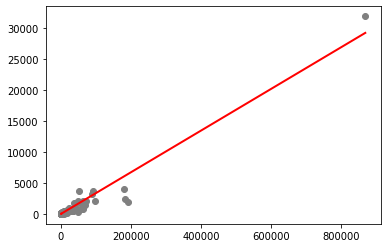

In [14]:
plt.scatter(X, y,  color='gray')
plt.plot(X,(reg.intercept_[0]+(reg.coef_[0][0]*X)), color='red', linewidth=2)
plt.show()

**Análise:**
- O resultado obtido através da nossa classe de regressão linear é igual ao resultado da classe de regressão linear do scikit-learn. 